In [327]:
"""
Python for Data Analysis - Chapter 4 - NumPy Basic: Arrays and Vectorized Computation

Things to review:
- How to visualizae what "transpose()" function is doing
- What does xrange do?
- Familirize myself with functions of 4-4, 4-5, 4-6, 4-7


Things learned here:

NumPy's goal: fast mathematical operations over data sets without using loops.

Plotting in-line in jupyter: %matplotlib inline
import numpy as np -- canonical way to begin

ndarray - fast and space-efficient multidimensional array providing vectorized arithmetic operations
Suppose that "data" is an ndarray.  Built-in functions are ...
    data = np.array([1,2,3])
    data.shape - returns dimensions of the array
    data.dtype - lets you know what type of data is in the dtype array.
        It's always dtype('int64') something like that with dtype
    data.astype(np.float64) - cast a particular dtype to another dtype, passed as a parameter

    ndim -  my_array.ndim - get the number of dimenions of the array
    zeros - x = np.zeros(a,b) - get an a x b array full of zeros
    ones -  x = np.ones(a,b)  - get an a x b array full of ones
    empty - x = np.empty(a,b) - get an a x b array full of nearly-zero unitialized garbage values
    arange - x =np.arange(b) - get a 1-dimensional array of length b ranging from 0 to b-1
    eye, identity - x = np.eye(b) - get a square b x b identity matrix

    Array slices are views back to the original array.  Data isn't copied so changes are back-propagated
    array.copy() - explicit call is required to copy an array rather than just point to a slice
    array slicing with :.  
        e.g. arr[5:8], arr[:1], arr[:, :1], arr[:2, :2]
    
    np.random.randn(a,b) - a 2-dimension a x b random array
    np.meshgrid - create (x,y) array from x and y vectors
    
Sorting and Array Filtering
    data.sort(axis = n) - sort just a single vector in the array
    np.unique(data) - returns sorted, unique values
    np.in1d - returns boolean array if value in given vector
    See Table 4-6 for array set operations
    
Boolean Operations
    np.where - vectorized, flexible conditional array logic
    np aggregations return values 0 and 1
    data.any() - "or" applied to whole array
    data.all() - "and" applid to whole array

File I/O
    np.save(file_location, arr) - save uncompressed
    np.savez(file_location, arr1, arr2, ...) - save compressed
    np.load(file_location) - load a file
        When loading a multi-file zip you get a dict indexed by array name
    np.loadtxt() - text file load
    np.genfromtxt() - like loadtxt but specialized; see later
    np.savetxt() - text file save

Math,  Statistics, Linear Algebra
    See Table 4-5 for list of math/stats reduction functions
    See Table 4-7 for list of numpy.linalg functions
    See Table 4-8 for random number generation functions
    np.sum()
    np.mean()
    etc.
    np.dot(x,y)
    np.random.randint(a, b, size=(n,m)) 
        # as usual range is [a,b)
        # (n,m) can just be n, then is a 1D array
    
Remember that %timeit is your benchmarker - runs samples

Fancy Indexing
    - Allows indexing using integer arrays
    - Copies rows into a new array
    - arr = np.empty((8,4)) - an 8 x 4 array
    - arr[[1,5,7,2], [0,3,1,2]]     
        # It pulls values at pairs (1,0) (5,3) (7,1) (2,2)
    - arr[[1,5,7,2]][:, [0,3,1,2]]
        # Here we're saying we want all rows at indices 1,5,7,2
            and cols at indices 0,3,1,2

Transposing
    - arr = np.arange(16).reshape((2,2,4))
        # 2 x 2 x 4 = 16 so this is a valid array
    - arr.transpose((1,0,2)) 
    # This is saying to swap axis 1 into 0, 0 into 1, and leave 2-->2
    # Hence transpose((0,1,2)) is an identity transpose
    # You're doing vector-for-vector swaps of each axis in order
    # So swapping the first vector of axis 1 for first vector of axis 2
    # 2nd vector of axis 1 for second vector of axis 2
    # For axis 1 and axis 2, the first vector is the same
    # The degeneracies will be different for other axes

Swapaxes
    - a special case of transposing, only specify 2 axes
    and the rest are assumed to remain in the same place

Universal Functions
    - element-wise array functions. See list in table 4-4.

"""
import numpy as np

In [3]:
# Manipulation of np.arrays element-by-element
data = np.array([[ 0.9526, -0.246 , -0.8856], [ 0.5639, 0.2379, 0.9104]])
data
data*10
data + data

array([[ 1.9052, -0.492 , -1.7712],
       [ 1.1278,  0.4758,  1.8208]])

In [4]:
# Lots of builtin methods on the np.array objects
data.shape
#data.dtype

(2, 3)

In [5]:
"""Recipes for creating ndarrays"""
# Start with data, for example a list
data1 = [6, 7.5, 8, 0, 1]
# It will get converted into an array
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [6]:
# Nested sequences will be converted into a multidimensional array
# Note the output of a np array is different than of a normal python array
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2
#arr2.ndim
#arr2.shape

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [7]:

# Can automatically shape and populate arrays with some specific variables
# An array full of zeros with length 10
np.zeros(10)

# An array full of zeros with 3 x 6 (3 rows by 6 columns)
np.zeros((3,6))

# An empty 3-dimensional array of 2 x 3 x 2.  Visualized as 2 distinct 3 x 2 arrays.
# EMPTY DOES NOT EQUAL ZEROS.  USUALLY VERY SMALL GARBAGE VALUES.
np.empty((2,3,2))

# np.arange(n) gets an arrage of length n with intetegers going from 0 to n-1
np.arange(15)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [8]:
"""Data type manipulation is easy and usually important to get right"""
# Force ints to act like floats
arr = np.array([1,2,3,4,5])
arr.dtype # returns dtype('int64')
float_arr = arr.astype(np.float64)
float_arr.dtype #returns dtype('float64')

# Casting a float to an int will truncate the decimal part
# Can cast strings to numbers similarly.  
np.array(['1.025','-9.6','42']).astype(float) # float will automatically get turned into float64 YAY PYTHON

array([  1.025,  -9.6  ,  42.   ])

In [9]:
"""Scalar and Vector operations"""

arr = np.array([[1., 2., 3.], [4., 5., 6.]])

# Operations are understood to be element-by-element when arrays are equally sized 
arr * arr
arr - arr
# Scalar operations are also element-by-element
3*arr
1/arr

# Operations between differently sized arrays is called "broadcasting" and will be discussed in more detail later

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [10]:
"""Basic Indexing and Slicing"""

arr = np.arange(10)
arr
arr[0] # returns 0. 0-indexed
arr[5] # returns 5.  still 0-indexed
arr[5:8] # returns 5,6,7.  still 0-indexed but Python always uses the end of a range as a "less than"
arr[5:8] = 12 # 'Broadcast' of value to positions, 5,6,7
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [11]:
# Array slices are views on the original array, even if pointed to by a different variable
arr_slice = arr[5:8]
arr_slice[1] = 12345 # Location 6 in arr is changed because arr_slice[1] refers to arr[6]
arr
# BE CAREFUL WITH THIS.

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [12]:
# Data must be explicitly copied
my_totally_new_arry = arr[5:8].copy()
my_totally_new_arry[0] = 11111
arr # we do not see 1111 in index 5 of the original array

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [13]:
"""First look at Array Axes, Slicing, Indexing, Copying"""

# 2 dimensional arrays work like you'd expect - reference with row #, col # pairs
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[2] # The result is an array
arr2d[0][2] # gives same as arr2d[0,2]
arr2d[0,2]  # gives same as arr2d[0][2]
# arr2d[axis 0 reference, axis 1 reference].  each axis is 0-indexed
#arr2d

3

In [14]:
# Similarly for higher dimensional arrays.
# Referencing fewer than all the dimensions returns a lower-dimensional ('flattened') array
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d
#arr3d[0] # Returns a 2-dimensional array: the 2 x 3 array at the 0th location.  
#arr3d[1,0] # Returns a 1-dimensional array: the 1 x 3 array at the (1,0) location

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [16]:
# Indexing with Slices
arr2d
arr2d[:2]  # Tells this to slice at the 0th axes (i.e. rows) up to (but not including) row 2 
arr2d[:2, 1:] # Tell this to slice along axis 0 up to row index 2 and from axis 1 frin column index 1 onward
    # So it's row index 0 and 1 and column index 1 and 2
arr2d[2, :1] # This is row index 2 and column index 0 (column index up to and not included 1, so just 0)
arr2d[:,:1]  # : is shorthand for all rows.  So this is all rows, 0th column
# Note that So [:b] = [0:b]
# Recall that [a:b] means "start at a and go less than b", so x in [a,b).  
#arr2d

array([[1],
       [4],
       [7]])

In [19]:
"""Boolean Indexing and using in assignment"""
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4) # a random array 7 x 4
print names
print data

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.3667337  -0.30384711  0.81987038 -1.50031975]
 [ 1.16697602  0.14797841 -0.16701052  0.09072371]
 [ 1.89559388 -1.10008376  0.53022409  1.14973091]
 [ 0.05734757  0.60341113  0.26391315  1.84556477]
 [-1.69466324 -0.65083775 -0.48851109  0.5228271 ]
 [-1.28888206  0.86161009 -1.11555431  0.49102673]
 [ 0.09271036 -0.7535076  -0.90264062 -1.10175603]]


In [58]:
# Matching strings
names == 'Bob' # comparing each element of names to the string 'Bob'
data[names == 'Bob'] 
    # gives the value of data at index 0 and index 3.
    # Those indices are understood to be the row axis (axis 0) because only 1 axis is given.
    # Mixing and matching two arrays like this only works because of dimension agreement
data[names == 'Bob',2:]

array([[-1.44524629, -1.42169795],
       [ 1.28394132,  0.19452311]])

In [22]:
# Negation and matching
data[names != 'Bob']
data[~(names == 'Bob')] # ~ on a == and != return the same thing in this case but ~ is more general

array([[ 1.16697602,  0.14797841, -0.16701052,  0.09072371],
       [ 1.89559388, -1.10008376,  0.53022409,  1.14973091],
       [-1.69466324, -0.65083775, -0.48851109,  0.5228271 ],
       [-1.28888206,  0.86161009, -1.11555431,  0.49102673],
       [ 0.09271036, -0.7535076 , -0.90264062, -1.10175603]])

In [25]:
# Other Boolean operators and matching
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 0.        ,  0.        ,  0.81987038,  0.        ],
       [ 1.89559388,  0.        ,  0.53022409,  1.14973091],
       [ 0.05734757,  0.60341113,  0.26391315,  1.84556477],
       [ 0.        ,  0.        ,  0.        ,  0.5228271 ]])

In [26]:
# Using Boolean operators in assignments
data[data < 0] = 0
data

array([[ 0.        ,  0.        ,  0.81987038,  0.        ],
       [ 1.16697602,  0.14797841,  0.        ,  0.09072371],
       [ 1.89559388,  0.        ,  0.53022409,  1.14973091],
       [ 0.05734757,  0.60341113,  0.26391315,  1.84556477],
       [ 0.        ,  0.        ,  0.        ,  0.5228271 ],
       [ 0.        ,  0.86161009,  0.        ,  0.49102673],
       [ 0.09271036,  0.        ,  0.        ,  0.        ]])

In [28]:
"""Fancy Indexing -- Indexing using iteger arays
It copies rows into a new array"""
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [31]:
arr[[4,3,0,6]] # Pass a list or ndarray of integers specifying the rows we want in order
    # So the expected output of the above is the arrays at axes 0 indices 4,3,0,6 in that order
    # It works!

array([[16, 17, 18, 19],
       [12, 13, 14, 15],
       [ 0,  1,  2,  3],
       [24, 25, 26, 27]])

In [66]:
# Fancy indexing with multiple index arrays
arr = np.arange(32).reshape((8,4)) # array that goes (0,1,2,3 \n, 4,5,6,7)
arr[[1,5,7,2], [0,3,1,2]]     
    # It pulls values at pairs (1,0) (5,3) (7,1) (2,2)

array([ 4, 23, 29, 10])

In [67]:
arr[[1,5,7,2]][:, [0,3,1,2]]
    # Here we're saying we want all rows at indices 1,5,7,2 and cols at indices 0,3,1,2
    # So the result is a matrix as opposed to single vector

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [34]:
"""Transposing Arrays and Swapping Axes"""

# Defining an array by its number of elements and shape
arr = np.arange( 15).reshape(( 3, 5))
arr
arr.T # Turns the 3x5 matrix into a 5x3 matrix

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [37]:
# Two-dimensional transposing and taking inner product
arr = np.arange( 18). reshape(( 6, 3))
np.dot(arr.T, arr) # (3 x 6) X (6 x 3) - leads to a 3 x 3 matrix

array([[495, 540, 585],
       [540, 591, 642],
       [585, 642, 699]])

In [69]:
"""Transposing"""
# Higher order transposing (axis permutation)
arr = np.arange(16).reshape((2,2,4)) # a 3 dimensional array, shown as stacked 2 dimensional arrays
print arr
arr.transpose((1,0,2)) # This is saying to swap axis 1 into 0, 0 into 1, and leave 2-->2

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [61]:
arr = np.arange(9).reshape((3,3))
print arr
arr.transpose((1,0))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [77]:
arr = np.arange(27).reshape((3,3,3))
print arr
arr.transpose((1,0,2))
# The first vector of axis 1 is swapped with the first vector of axis 2
# But those vectors are the same thing so no swap.
# Then the second vector of axis 1 with second vector of axis 2
## (3,4,5) swaps places with (9,10,11).  
## Continuing, (6,7,8) swaps places with (18,19,20)
## Can use 

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


array([[[ 0,  1,  2],
        [ 9, 10, 11],
        [18, 19, 20]],

       [[ 3,  4,  5],
        [12, 13, 14],
        [21, 22, 23]],

       [[ 6,  7,  8],
        [15, 16, 17],
        [24, 25, 26]]])

In [90]:
# For swapping individual axes without specifying full transposition
# swapaxes() 
arr = np.arange(16).reshape((2,2,4))
    # a 3 dimensional array, shown as stacked 2 dimensional arrays
print arr
#print arr.transpose(1,0,2)
arr.swapaxes(1,0) == arr.transpose(1,0,2) # Values are True
arr.swapaxes(1,2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [94]:
"""Universal Functions: Fast Element-wise array functions"""
arr = np.arange(10)

# 'Unary' ufuncs take just one value
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [98]:
arr = np.arange(10)
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [102]:
#Binary ufuncs take two arrays as inputs and return 1
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x, y)
    # Output is an array with the maximum pair-wise comparison


array([ 1.14999474,  0.12337802,  2.60176596, -1.2520075 ,  0.85793551,
        0.22029581,  0.51542324,  0.8892236 ])

In [124]:
#Ufuncs can return multiple arrays
#modf returns the integer and decomal part of floats in an array
arr = np.random.randn(5)
np.modf(arr)

(array([ 0.76713501, -0.8079204 ,  0.02544665, -0.38062957, -0.62481356]),
 array([ 0., -0.,  1., -1., -0.]))

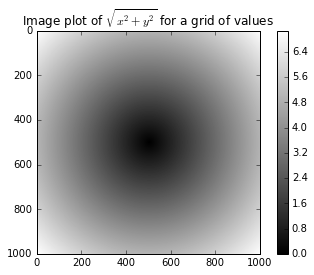

In [139]:
"""Data Processing Using Arrays"""
points = np.arange(-5, 5, 0.01) # 1000 points linearly spaced
xs, ys = np.meshgrid(points, points)

import matplotlib.pyplot as plt
%matplotlib inline
z = np.sqrt(xs ** 2 + ys ** 2)
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [164]:
"""Expressing Conditional Logic as Array Operations"""
xarr = np.arange(1.1, 1.6, 0.1)
yarr = np.arange(2.1, 2.6, 0.1)
cond = np.array([True, False, True, True, False])

In [165]:
# List comprehension approach
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result
# THIS IS A BAD APPROACH
# Slow because doesn't use NP's optimized operations
# Zip doesn't generalize to multidimensional arrays

[1.1000000000000001,
 2.2000000000000002,
 1.3000000000000003,
 1.4000000000000004,
 2.5000000000000004]

In [169]:
# Numpy "where" approach - much faster
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [170]:
# xarr and yarr don't need to be array
# 1 can be an array and the other a scalar
result = np.where(cond, xarr, "nope")
result

array(['1.1', 'nope', '1.3', '1.4', 'nope'], 
      dtype='|S32')

In [178]:
# Another example with where - replacing with scalars
arr = np.random.randn(4, 4) # 4 numbers per array, 4 arrays
#arr
result = np.where(arr < 0, 2, -2)
result

array([['1.29018452385', '1.25975906788', '0.986456531317', '1.78882670499'],
       ['0.0602830816503', '0.963244189255', '1.2601403008', 'pos'],
       ['0.997207676885', 'pos', 'pos', '1.18348098365'],
       ['pos', 'pos', 'pos', 'pos']], 
      dtype='|S32')

In [179]:
# Another example with where
# - replacing with original array with array is positive
arr = np.random.randn(4, 4) # 4 numbers per array, 4 arrays
result = np.where(arr < 0, arr, -2)
result

array([[-0.5440826 , -0.34377579, -1.67806867, -1.32544144],
       [-0.21988716, -1.04968869, -0.41889077, -0.25470647],
       [-0.28716787, -1.38178301, -0.71527872, -2.        ],
       [-0.10342649, -0.39172657, -0.31174678, -1.76731038]])

In [180]:
""" Always think how to use where instead of for loops
Nesting where() expressions can be powerful
"""

' Always think how to use where instead of for loops\nNesting where() expressions can be powerful\n'

In [192]:
"""Mathematical and Statistical methods"""
arr = np.random.randn(5,4) # normally-distributed data
arr

array([[ 1.99333488,  0.04136674,  0.26629819, -1.63786069],
       [-0.10902358, -0.83663286,  1.8306482 ,  1.13460068],
       [ 3.43841781, -0.11397898, -1.37338493, -0.25977642],
       [ 1.385994  , -0.50482934,  1.19819993,  0.62794538],
       [ 0.76889922, -0.25737079, -0.74536867,  1.5372067 ]])

In [187]:
# Equivalent methods of calling an np function
arr.mean()
np.mean(arr)

-0.19827523942192099

In [188]:
arr.sum()
np.sum(arr)

-3.96550478843842

In [197]:
# Specifying an axis will compute only along that axis
# axis = 0 means make a vector out of nth value in each array
# axis = 1 means average each vector in order and insert result
# in order into a vector with the other results
arr.mean(axis=1)

array([ 0.16578478,  0.50489811,  0.42281937,  0.67682749,  0.32584162])

In [202]:
arr.sum(axis=0)

array([ 7.47762233, -1.67144523,  1.17639273,  1.40211566])

In [204]:
np.cumsum(arr) # cumsum() and cumprod() result in arrays
    # where nth element is sum of elements [0,n]

array([ 1.99333488,  2.03470162,  2.30099982,  0.66313913,  0.55411555,
       -0.28251731,  1.54813089,  2.68273157,  6.12114938,  6.0071704 ,
        4.63378547,  4.37400905,  5.76000306,  5.25517371,  6.45337364,
        7.08131902,  7.85021824,  7.59284745,  6.84747878,  8.38468548])

In [ ]:
"""Boolean Arrays - coerced to 0 & 1 by np functions"""

In [213]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

60

In [218]:
"""Sorting with numpy"""
arr = np.random.randn(8)
arr.sort() # Manipulates the array in-place
arr

array([-0.92422349, -0.72880147, -0.53762053, -0.53057904, -0.35979226,
        0.62331577,  1.52430756,  3.58706278])

In [222]:
# Multi-dimensional arrays can sort along each axis
arr = np.random.randn(5,3)
print arr
arr.sort(1)
arr

[[ 0.69187551 -1.1332549   1.59361257]
 [ 1.96244084  2.22566894 -1.13951133]
 [ 0.56792644  1.4654171   0.93809511]
 [-1.34544065  1.71555359  0.99563351]
 [-0.63521078  0.5966666   1.49828313]]


array([[-1.1332549 ,  0.69187551,  1.59361257],
       [-1.13951133,  1.96244084,  2.22566894],
       [ 0.56792644,  0.93809511,  1.4654171 ],
       [-1.34544065,  0.99563351,  1.71555359],
       [-0.63521078,  0.5966666 ,  1.49828313]])

In [225]:
"""Unique and other Set Logic"""
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='|S4')

In [236]:
arr = np.random.randn(10)
arr = arr.astype('int64')
np.unique(arr)

array([-1,  0,  2])

In [241]:
# Determine if array value is in given vector
# Returns a boolean array
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

In [244]:
"""File Input and Output with Arrays"""
arr = np.arange(10)
np.save('some_array', arr) # Default as binary .npy file

In [246]:
np.load('some_array.npy') 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [247]:
np.savez('array_archive.npz', a=arr, b=arr) 

In [252]:
# Loading into a 2-dimensional array
""" File contains
0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334
"""
arr = np.loadtxt('array_ex.txt', delimiter=',')
#arr = np.genfromtxt('array_ex.txt', delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

In [258]:
"""
Linear Algebra
Numpy operations are element-by-element so we have to use
functions to perform matrix operations
"""
x = np.arange(1.,7.).reshape(2,3)
y = np.array([[6., 23.], [-1, 7], [8,9]])
x, y

(array([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]]), array([[  6.,  23.],
        [ -1.,   7.],
        [  8.,   9.]]))

In [260]:
# Matrix Dot Product
x.dot(y) # This is ugly don't use it
np.dot(x,y) # this is pretty

array([[  28.,   64.],
       [  67.,  181.]])

In [261]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [272]:
# Matrix Operations Examples
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
X

array([[ 0.5291963 , -0.3723125 , -1.26754701,  1.41607426,  1.47006081],
       [ 0.32538366, -0.51800725, -1.13648004, -0.74619593, -0.632463  ],
       [ 1.51418256,  0.82572854,  0.17888145,  0.66662857, -1.76465835],
       [-0.9983306 ,  0.04921476, -0.07243645,  1.71818831, -0.81937469],
       [ 1.00259199,  0.53776141, -2.24641295, -0.5657528 , -0.2912689 ]])

In [275]:
# Matrix dot product
mat = X.T.dot(X)
mat

array([[  4.68052676e+00,   1.37474895e+00,  -2.94963415e+00,
         -7.66560532e-01,  -1.57387433e+00],
       [  1.37474895e+00,   1.38038516e+00,  -3.26312834e-03,
          1.90087204e-01,  -1.87378886e+00],
       [ -2.94963415e+00,  -3.26312834e-03,   7.98187905e+00,
          3.18798541e-01,  -7.46591410e-01],
       [ -7.66560532e-01,   1.90087204e-01,   3.18798541e-01,
          6.27871562e+00,   1.34231095e-01],
       [ -1.57387433e+00,  -1.87378886e+00,  -7.46591410e-01,
          1.34231095e-01,   6.43131975e+00]])

In [276]:
# Matrix inversion and subsequent multiplication
mat.dot(inv(mat))

array([[  1.00000000e+00,  -4.09494747e-17,   1.29617803e-16,
         -6.08925074e-18,   0.00000000e+00],
       [  3.01943266e-17,   1.00000000e+00,   4.54630632e-17,
          1.14331212e-17,   5.55111512e-17],
       [ -2.58503169e-17,   3.38877515e-16,   1.00000000e+00,
         -3.03724664e-17,   0.00000000e+00],
       [ -1.01024966e-16,   2.70941322e-16,  -4.19739018e-17,
          1.00000000e+00,   8.32667268e-17],
       [ -4.16333634e-17,   0.00000000e+00,  -2.77555756e-17,
          1.38777878e-17,   1.00000000e+00]])

In [287]:
# Perform triangular QR decomposition
q, r = qr(mat)
print q # a full matrix
print r # an upper triangular matrix 
print np.dot(q, r) # Their matrix dor product is the original matrix

[[-0.78487374  0.04695648 -0.51854449 -0.33539826 -0.01969588]
 [-0.23053054 -0.48394839  0.1925926   0.12626383  0.81216696]
 [ 0.49462176 -0.4694823  -0.72126996 -0.11095486  0.04893213]
 [ 0.12854391 -0.21932404  0.36565586 -0.89438045 -0.04186692]
 [ 0.26392171  0.7036138  -0.20021275 -0.2435941   0.57952542]]
[[-5.96341366 -1.8689383   6.10779161  1.5580342   3.01259731]
 [ 0.         -1.96206422 -4.47950838 -1.56028406  5.6791502 ]
 [ 0.          0.         -3.96215384  2.47313968 -0.24480988]
 [ 0.          0.          0.         -5.40252641 -1.3125643 ]
 [ 0.          0.          0.          0.          2.1941306 ]]
[[  4.68052676e+00   1.37474895e+00  -2.94963415e+00  -7.66560532e-01
   -1.57387433e+00]
 [  1.37474895e+00   1.38038516e+00  -3.26312834e-03   1.90087204e-01
   -1.87378886e+00]
 [ -2.94963415e+00  -3.26312834e-03   7.98187905e+00   3.18798541e-01
   -7.46591410e-01]
 [ -7.66560532e-01   1.90087204e-01   3.18798541e-01   6.27871562e+00
    1.34231095e-01]
 [ -1.57

In [304]:
"""Random Number Generation"""
# Sample vectors from a normal distribution
from random import normalvariate
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.1980029 ,  1.54524632, -1.06146726, -1.38446168],
       [ 0.21654332, -0.3945102 ,  2.069259  , -0.15735226],
       [-2.23057367, -0.69803958,  1.89197518,  0.41489822],
       [-1.02708776,  1.01085517, -0.95538739,  0.24897973]])

In [305]:
N = 10**6

In [301]:
# Python's built-in normal samples has to sample 1 at a time
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]

1 loop, best of 3: 1.04 s per loop


In [302]:
# Numpy grabs the results more efficiently as vectors
%timeit np.random.normal(size=N)

10 loops, best of 3: 39.2 ms per loop


In [ ]:
"""Example - Random Walks"""

xrange(1000)

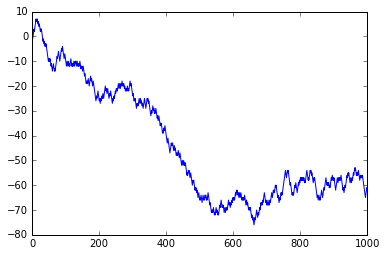

In [325]:
# Vanilla python method
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk)

In [333]:
# Numpy method - use cumsum which will keep track of location
# MUCH FASTER AND SIMPLER CODE
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [336]:
# Determine the first time the walk reached a target
target = 10
# First get a boolean array where we have hit the value
# Then use function argmax() to find first argument that
# reaches the max value.  True --> 1, False --> 0 so we're
# finding the first True value, where we have reached a target
# argmax() isn't actually efficient b/c has to scan whole array
(np.abs(walk) >= target).argmax()

39

In [339]:
"""
Simulation --
If we wanted to generate many random walks at once
we can just pass another parameter into the randomize function
and use Numpy's vectorized wonder to scan them
"""
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
# size is a matrix
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
    # axis = 1 means cumsum within each vector
walks

array([[  1,   2,   1, ..., -42, -41, -40],
       [ -1,   0,  -1, ...,  12,  11,  12],
       [ -1,  -2,  -1, ...,  -4,  -5,  -6],
       ..., 
       [ -1,   0,  -1, ...,  18,  17,  16],
       [ -1,  -2,  -3, ...,  58,  57,  56],
       [ -1,   0,  -1, ...,   0,   1,   2]])

In [346]:
# Compute the time that it takes each of them to reach -30 or 30
# Observe that not all of them will necesarily reach those values

hits30 = (np.abs(walks) >= 30).any(1)
    # using np.abs() to check each element of each vector
    # using any(1) get vector-by-vector reduction
    # Result is an array with True/False elements, where value
    # at that element corresponds to any()'s map to 
    # the same index vector in walks
hits30.sum()
    # Tells us how many walks hit those values
hits30.sum().astype(np.float)/nwalks
    # % that hit those values

0.66900000000000004

In [354]:
# Use boolean operations to pick the vectors that hit the target
crossing_indices = (np.abs(walks[hits30]) >= 30).argmax(1)
    # walks[hits30] gives vectors that were true
    # np.abs() applies absolute value to their values
    # >= 30 does another boolean result to find
    #     the elements >= 30
    # argmax() takes advantage of Nmpy coercing true to 1
    #     to find the first instance of the max value (1 is the max)
    # argmax(1) == argmax(axis = 1) means vector-by-vector
crossing_indices.mean()
    # We found the average crossing time after 5000 tests

497.05680119581467